In [4]:
!pip install -q tensorflow-gpu==2.7.0rc1
import tensorflow as tf
print(tf.__version__)

2.7.0-rc1


You should consider upgrading via the 'c:\users\rishabh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train, X_test = X_train / 255. , X_test / 255. 

print(X_train.shape)

4431872/4422102 [==============================] - 2s 1us/step
(60000, 28, 28)


In [7]:
"""
    The data is 2-D, Convolution expects 3-D i.e height X width X color.
    np.expand_dims adds one dimension in the last position.
"""
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(X_train.shape)

(60000, 28, 28, 1)


In [8]:
k = len(set(Y_train))
print(f"Number of classes is {k}")

Number of classes is 10


In [9]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(124, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)
model = Model(i, x)

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4989 - accuracy: 0.8156 - val_loss: 0.4072 - val_accuracy: 0.8474
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3710 - accuracy: 0.8606 - val_loss: 0.3720 - val_accuracy: 0.8634
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3234 - accuracy: 0.8785 - val_loss: 0.3222 - val_accuracy: 0.8818
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2913 - accuracy: 0.8895 - val_loss: 0.3186 - val_accuracy: 0.8851
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2662 - accuracy: 0.8988 - val_loss: 0.2982 - val_accuracy: 0.8928
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2435 - accuracy: 0.9077 - val_loss: 0.3048 - val_accuracy: 0.8927
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2295 - accuracy: 0.9134 - val_loss: 0.3044 - val_acc

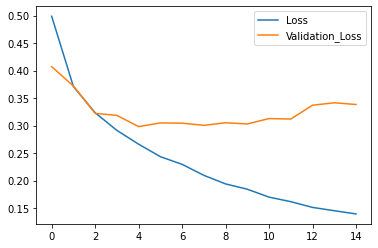

In [12]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation_Loss')
plt.legend()

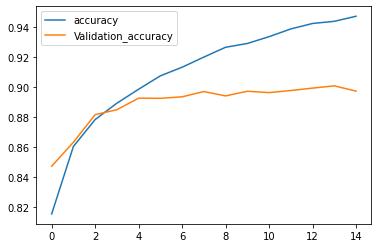

In [13]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='Validation_accuracy')
plt.legend()

In [14]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8975


[0.33836543560028076, 0.8974999785423279]

Confusion Matrix, Without Normalization
[[880   1  23  20   3   1  65   0   7   0]
 [  2 973   1  14   2   0   7   0   1   0]
 [ 16   1 874  10  47   0  50   0   2   0]
 [ 11   4  19 918  29   0  18   0   1   0]
 [  3   0  62  26 865   0  41   0   3   0]
 [  1   0   0   2   0 962   0  23   3   9]
 [151   0  74  33 131   0 603   0   8   0]
 [  0   0   0   0   0   9   0 969   1  21]
 [  0   2   6   2   2   3   7   2 976   0]
 [  0   0   0   0   0   6   1  38   0 955]]


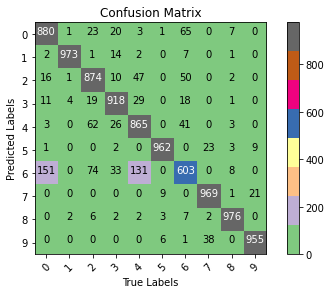

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, 
                          title="Confusion Matrix",
                          cmap=plt.cm.Accent,):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks(tick_marks, classes) 

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2. 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center',
        color="white" if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels')
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

Text(0.5, 1.0, 'True Label: 6 Predicted: 2')

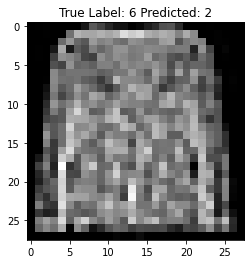

In [16]:
misclassified_idx = np.where(p_test!=Y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True Label: %s Predicted: %s" % (Y_test[i], p_test[i]))